In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.utils import plot_model
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


In [3]:
scaler = preprocessing.StandardScaler().fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [4]:
model = Sequential(
    [
        Dense(64, input_dim=13, activation='relu'),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1)
    ]
)

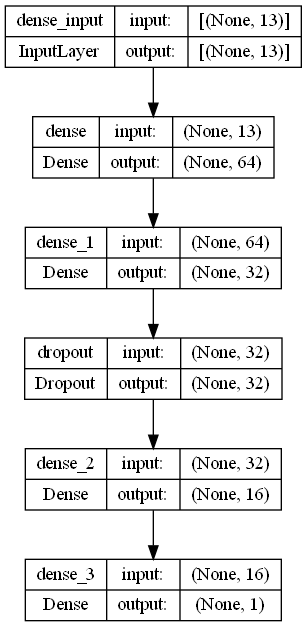

In [6]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [7]:
model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error'])

In [8]:
loss, metrics = model.evaluate(x_test_scaled, y_test, verbose=0)
print('loss (MSE): %.2f, metrics (MSE): %.2f' % (loss, metrics))

loss (MSE): 597.89, metrics (MSE): 22.73


In [10]:
prediction = model.predict(x_test_scaled)

for i in range(10):
    print('predicted %.2f ==> Expected %.2f' % (prediction[i], y_test[i]))

4/4 [==============================] - 0s 2ms/step
predicted 0.01 ==> Expected 7.20
predicted 0.16 ==> Expected 18.80
predicted 0.13 ==> Expected 19.00
predicted 0.65 ==> Expected 27.00
predicted -0.12 ==> Expected 22.20
predicted 0.02 ==> Expected 24.50
predicted 0.68 ==> Expected 31.20
predicted 0.37 ==> Expected 22.90
predicted 0.11 ==> Expected 20.50
predicted 0.30 ==> Expected 23.20
